In [67]:
from qiskit_ionq import IonQProvider, ionq_job
ionq_provider = IonQProvider("mycsEhnoIgARQdch53Zm7KJUePwFD0Wr")
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.tools.visualization import plot_histogram, array_to_latex
from qiskit.visualization import plot_state_city, plot_bloch_multivector
from qiskit.quantum_info import Statevector, DensityMatrix, Operator
from matplotlib import pyplot as plt
import numpy as np
import time
from qiskit.circuit import Parameter


In [397]:
n=int(input("Odd number"))

In [398]:
sim_backend = ionq_provider.get_backend('ionq_simulator')

qpu_backend = ionq_provider.get_backend('ionq_qpu')

In [399]:
Alice=3
Bob=1

#Alice=Bob or Bob+1 = Alice (mod n)
#Bob이 Alice보다 큰 값 갖는다 가정
#same : 3,3
#different : 3,1

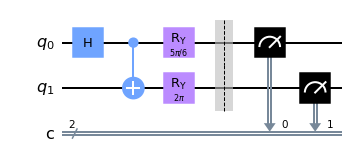

In [400]:
qr = QuantumRegister(2,'q')
cr = ClassicalRegister(2,'c')
qc = QuantumCircuit(qr,cr)

qc.h(0)
qc.cx(0,1)

qc.ry(((np.pi/2-np.pi/(2*n))*Bob+np.pi/(4*n))*2,0)
qc.ry(((np.pi/2-np.pi/(2*n))*Alice)*2,1)

#*2한 이유는 bloch 상에서는 실제 value의 2를 보이기 때문

qc.measure_all(add_bits=False)
qc.draw(output='mpl')


In [251]:
ID = []

In [252]:
for i in range(10):
    job = qpu_backend.run(qc,shots = 1024)
    ID.append(job.job_id())

In [253]:
f = open("C:/Users/cbk92/Desktop/해커톤/ID_2.1_n15_same.txt",'w')

for i in range(10):
    f.write(ID[i])
    f.write('\n')

f.close()

In [389]:
f = open("C:/Users/cbk92/Desktop/해커톤/ID_2.1_n7_different.txt",'r')
ID_after=f.readlines()



f.close()

In [390]:
for i in range(10):
    ID_after[i] = ID_after[i].strip('\n')

In [391]:
arr_prob=[]
for i in range(10):
    job_ret = qpu_backend.retrieve_job(ID_after[i])
    probs = job_ret.get_probabilities()
    arr_prob.append(probs)

In [392]:
tot_g=[]
for i in range(10):
    g=arr_prob[i].get('01')+arr_prob[i].get('10')
    tot_g.append(g)

In [393]:
np.mean(tot_g)

0.9743790963571843

In [401]:
job = sim_backend.run(qc,shots = 1024)

In [402]:
probs = job.get_probabilities()
counts = job.get_counts()
print(probs)

{'00': 0.0334936491, '01': 0.466506351, '10': 0.466506351, '11': 0.0334936491}


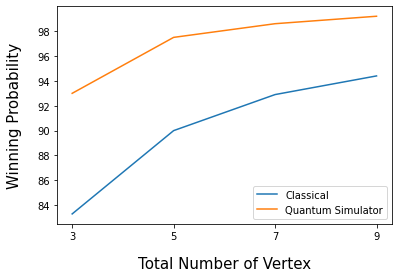

In [458]:
x_value = [3,5,7,9]

y_value_1 = [83.3,90.0,92.9,94.4]
y_value_2 = [93.0,97.5,98.6,99.2]
plt.xticks([3,5,7,9])

plt.plot(x_value,y_value_1)
plt.plot(x_value,y_value_2)
plt.xlabel('Total Number of Vertex',fontsize = 15,labelpad = 15)
plt.ylabel('Winning Probability',fontsize = 15,labelpad = 15)
plt.legend(['Classical','Quantum Simulator'])

plt.show()

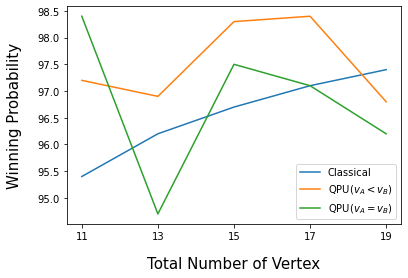

In [422]:
x_value = [11,13,15,17,19]

y_value_1 = [95.4,96.2,96.7,97.1,97.4]
y_value_2 = [97.2,96.9,98.3,98.4,96.8]
y_value_3 = [98.4,94.7,97.5,97.1,96.2]

plt.xticks([11,13,15,17,19])
plt.plot(x_value,y_value_1)
plt.plot(x_value,y_value_2)
plt.plot(x_value,y_value_3)
plt.legend(['Classical','QPU($v_A<v_B$)','QPU($v_A=v_B$)'])
plt.xlabel('Total Number of Vertex',fontsize = 15,labelpad = 15)
plt.ylabel('Winning Probability',fontsize = 15,labelpad = 15)

plt.show()

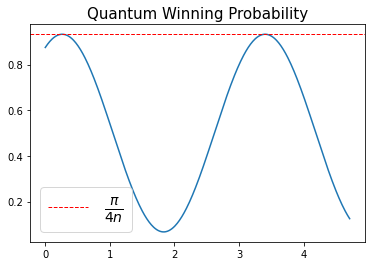

In [457]:
x=np.linspace(0,1.5*np.pi,400)
y=1/2*(np.cos(x))**2+1/2*(np.cos(np.pi/6-x))**2
plt.plot(x,y)
plt.axhline(y=np.cos(np.pi/12)**2,color='r',linewidth=1,ls='--',label='$\\frac{\pi}{4n}$')
plt.legend(prop={'size':20})

plt.title('Quantum Winning Probability',size=15)
plt.show()